In [1]:
from model_testing import test_OLS, test_logistic
import pandas as pd

path = '/Users/jeremyg/Documents/GitHub/SummerIndependentProject/tickData/factors_data/'

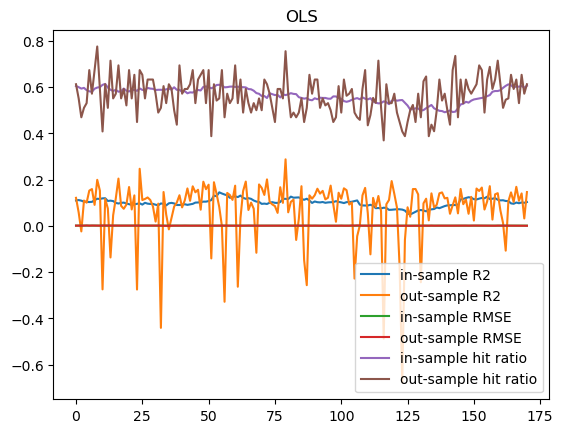

in-sample R2:  0.10060698066507791
out-sample R2:  0.07320542870647939
in-sample RMSE:  0.0010114441301552585
out-sample RMSE:  0.0009728579736172481
in-sample hit ratio:  0.5654956215017539
out-sample hit ratio:  0.5629207443587573


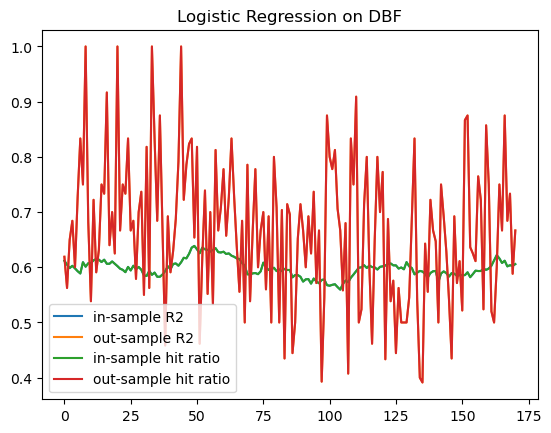

in-sample R2:  0.5982185479441463
out-sample R2:  0.6664474224882242
in-sample RMSE:  1.2674774862628162
out-sample RMSE:  1.1229247468140828
in-sample hit ratio:  0.5982185479441463
out-sample hit ratio:  0.6664474224882242


In [19]:
symbol = 'DBF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-09-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)

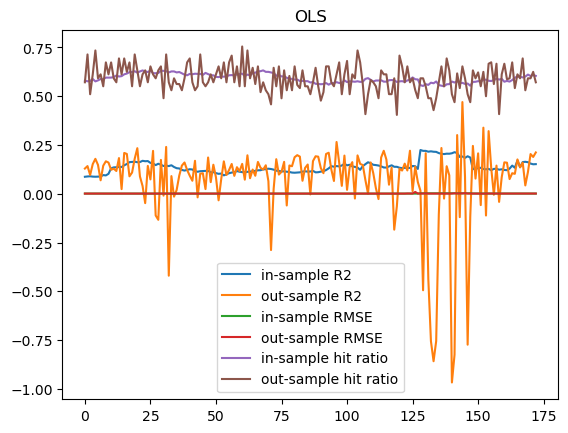

in-sample R2:  0.13762134972379667
out-sample R2:  0.06767690626384662
in-sample RMSE:  0.0009863163377398369
out-sample RMSE:  0.0008826554375076438
in-sample hit ratio:  0.5924017900559624
out-sample hit ratio:  0.5911702520701901


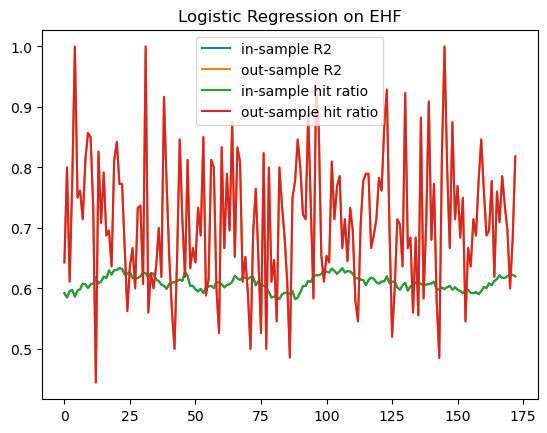

in-sample R2:  0.6092878970890052
out-sample R2:  0.7109298600204476
in-sample RMSE:  1.249990032951587
out-sample RMSE:  1.0479555276130432
in-sample hit ratio:  0.6092878970890052
out-sample hit ratio:  0.7109298600204476


In [20]:
symbol = 'EHF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-09-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)

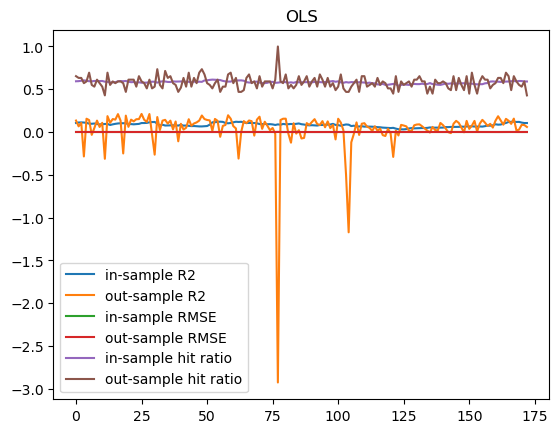

in-sample R2:  0.08269929688904029
out-sample R2:  0.038015993655872125
in-sample RMSE:  0.0007791285877632852
out-sample RMSE:  0.0007687391279486154
in-sample hit ratio:  0.5811962176938051
out-sample hit ratio:  0.5778468098864458


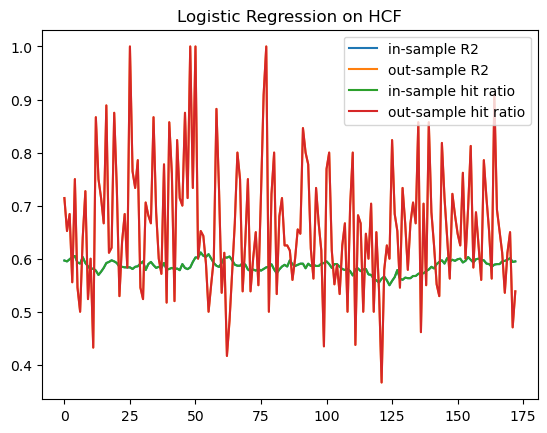

in-sample R2:  0.5858381434408327
out-sample R2:  0.6608936247587984
in-sample RMSE:  1.2869861203389326
out-sample RMSE:  1.1346825934303537
in-sample hit ratio:  0.5858381434408327
out-sample hit ratio:  0.6608936247587984


In [21]:
symbol = 'HCF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-09-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)

In [13]:
symbol = 'IIF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-09-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)

IndexError: index -1 is out of bounds for axis 0 with size 0

In [15]:
symbol = 'IPF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-09-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)

IndexError: index -1 is out of bounds for axis 0 with size 0

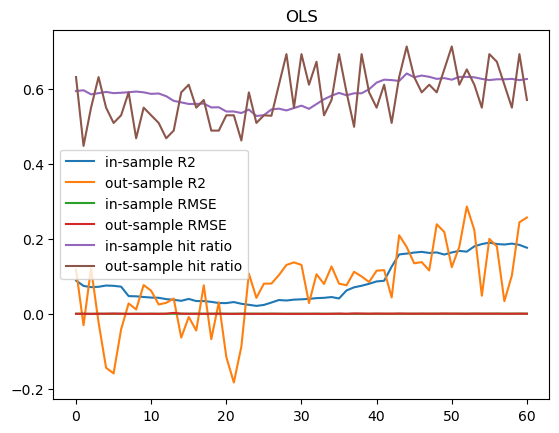

in-sample R2:  0.08732134523504174
out-sample R2:  0.0770397328107837
in-sample RMSE:  0.0011385851766461115
out-sample RMSE:  0.001145129335304667
in-sample hit ratio:  0.5900019888035674
out-sample hit ratio:  0.5821841731494677


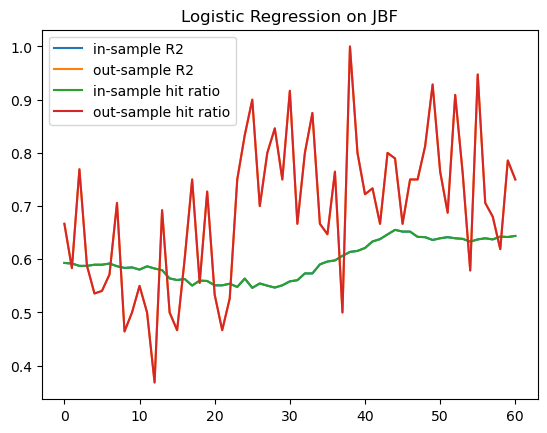

in-sample R2:  0.5972188272019793
out-sample R2:  0.6916017131103668
in-sample RMSE:  1.268059499355433
out-sample RMSE:  1.0728409349325312
in-sample hit ratio:  0.5972188272019793
out-sample hit ratio:  0.6916017131103668


In [18]:
symbol = 'JBF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-09-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2022-09-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)

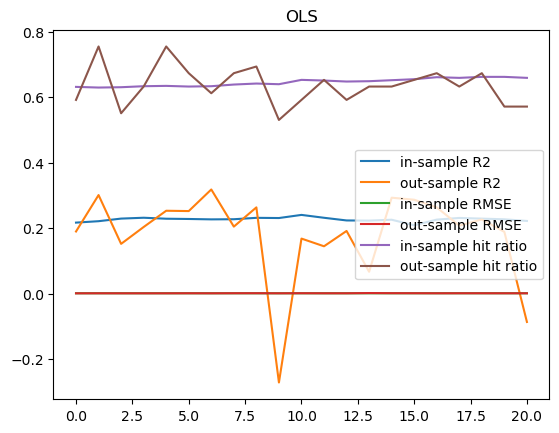

in-sample R2:  0.2266708001295991
out-sample R2:  0.18169627051234727
in-sample RMSE:  0.0009199341462444203
out-sample RMSE:  0.0009503229534176176
in-sample hit ratio:  0.6456754130223518
out-sample hit ratio:  0.6355685131195334


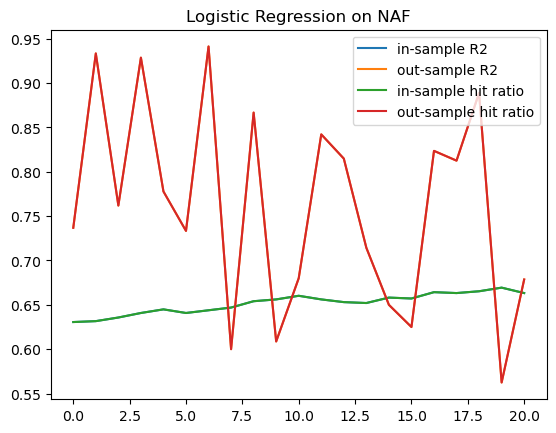

in-sample R2:  0.6517978620019436
out-sample R2:  0.7609760500521932
in-sample RMSE:  1.1800242304128656
out-sample RMSE:  0.9453884310379395
in-sample hit ratio:  0.6517978620019436
out-sample hit ratio:  0.7609760500521932


In [28]:
symbol = 'NAF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2020-07-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2020-07-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2020-07-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)

/Users/jeremyg/opt/anaconda3/envs/Segantii/lib/python3.8/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


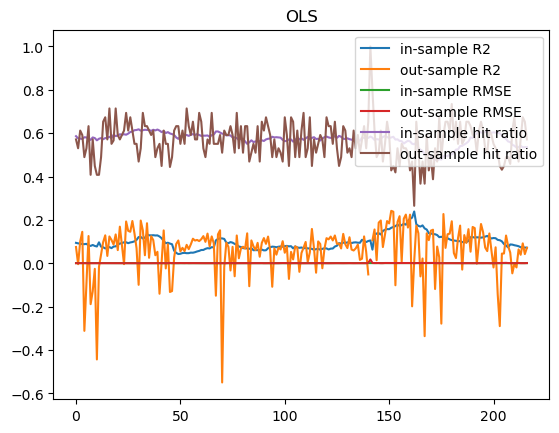

in-sample R2:  0.09837044777987133
out-sample R2:  nan
in-sample RMSE:  0.0009472396492424695
out-sample RMSE:  0.0009887080281998873
in-sample hit ratio:  0.5733014817343253
out-sample hit ratio:  0.5659466054531774


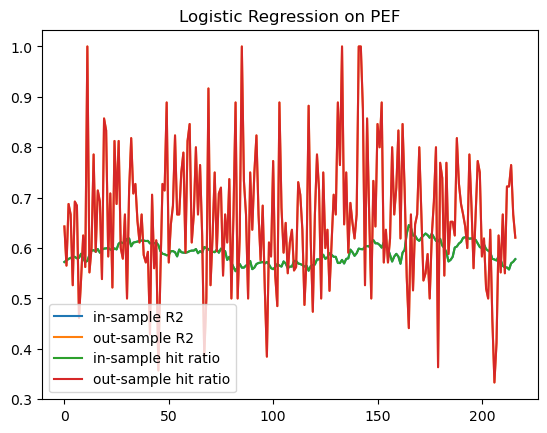

in-sample R2:  0.5908102275703366
out-sample R2:  0.6593069923103085
in-sample RMSE:  1.2790038293991053
out-sample RMSE:  1.1365987148141425
in-sample hit ratio:  0.5908102275703366
out-sample hit ratio:  0.6593069923103085


In [32]:
symbol = 'PEF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-07-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2022-07-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2022-07-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)

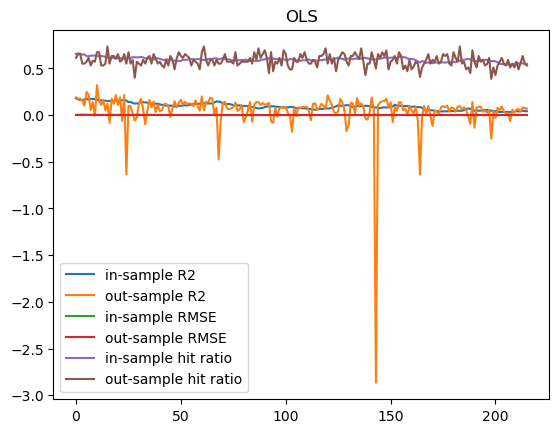

in-sample R2:  0.09345003044898872
out-sample R2:  0.05001999662585913
in-sample RMSE:  0.0010028287603968938
out-sample RMSE:  0.0009629145482074025
in-sample hit ratio:  0.5946652282071017
out-sample hit ratio:  0.5832159921647647


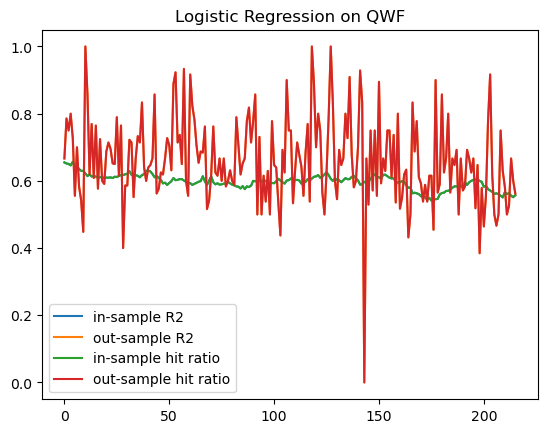

in-sample R2:  0.5975425494370863
out-sample R2:  0.6620021381613069
in-sample RMSE:  1.268330358207208
out-sample RMSE:  1.1345156768245024
in-sample hit ratio:  0.5975425494370863
out-sample hit ratio:  0.6620021381613069


In [33]:
symbol = 'QWF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-07-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2022-07-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2022-07-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)

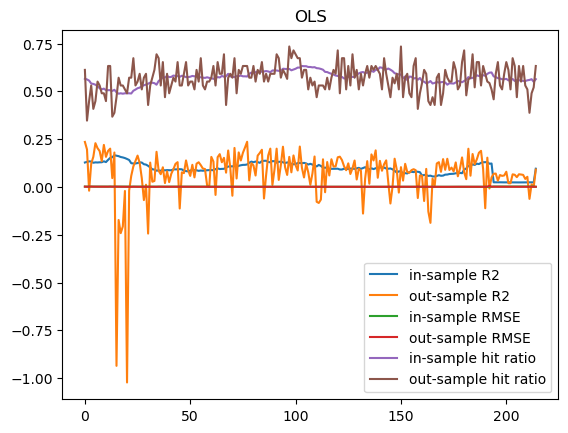

in-sample R2:  0.09670166244716473
out-sample R2:  0.07158715220447344
in-sample RMSE:  0.0009780577006868248
out-sample RMSE:  0.0008210118218169571
in-sample hit ratio:  0.5719407295530339
out-sample hit ratio:  0.5681100954031759


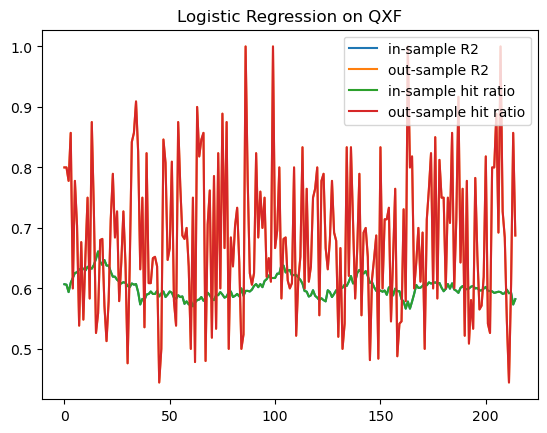

in-sample R2:  0.6017132787816251
out-sample R2:  0.6833204371733271
in-sample RMSE:  1.2618999593178544
out-sample RMSE:  1.0965172386928455
in-sample hit ratio:  0.6017132787816251
out-sample hit ratio:  0.6833204371733271


In [34]:
symbol = 'QXF'
data = pd.read_csv(path + '{}_factors.csv'.format(symbol), index_col=0)
data.index = pd.to_datetime(data.index)
data['delta_1'] = data['spread'].diff().shift(-1)
data = data.loc['2022-07-02':]
# lists = ['spread', 'RSI', 'MACD', 'MACDhist','EMA_5', 'MA_5']
lists = ['spread', 'RSI']
test_OLS(data, lists, pd.to_datetime('2022-07-02 09:05:00'), 20, 1)
test_logistic(data, lists, pd.to_datetime('2022-07-02 09:05:00'), 20, 1, symbol, 'RSI',0.8, 0.2)